In [92]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Carregar os dados
dados = pd.read_csv('https://raw.githubusercontent.com/Cayan-Portela/ceub/main/dados/mtcars.csv')

# Separar as variáveis
x = dados[['wt']]
y = dados['mpg']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Definir o intervalo de valores para alpha
param_grid = {'alpha': np.logspace(-3, 3, 100)}

# Criar o modelo de regressão Ridge
model_ridge = Ridge()

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(model_ridge, param_grid, scoring='neg_mean_squared_error', cv=5)

# Executar a busca de grade
grid_search.fit(X_train, y_train)

# Imprimir o melhor alpha
print(f"Melhor alpha: {grid_search.best_params_['alpha']}")

# Avaliar o modelo com o melhor alpha no conjunto de teste
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE no conjunto de teste: {rmse:.2f}")

Melhor alpha: 1.232846739442066
RMSE no conjunto de teste: 3.54


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


LinearRegression()
b0: 37.2851 
b1: [-5.3445]
RidgeRegression()
b0: 36.7247 
b1: [-5.1703]


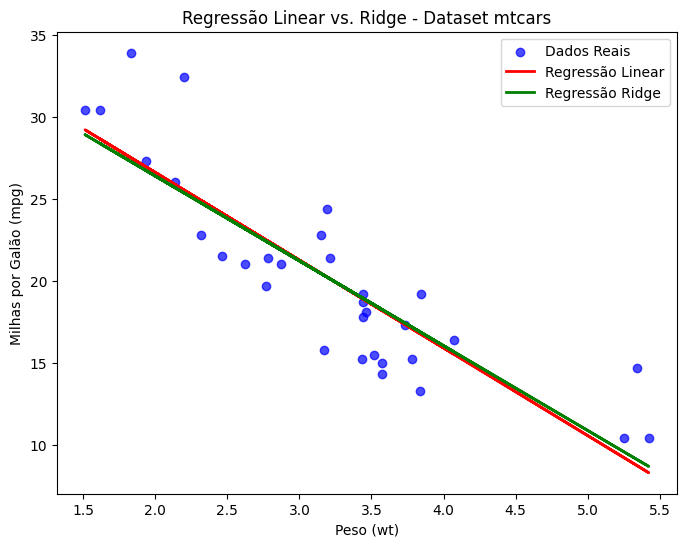

In [93]:
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt

# Regressão Linear
regr = LinearRegression()
regr.fit(x, y)
b0 = regr.intercept_
b1 = regr.coef_
print(f"LinearRegression()")
print(f"b0: {np.round(b0, 4)} \nb1: {np.round(b1, 4)}")

# Regressão Ridge
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(x, y)
b0Ridge = model_ridge.intercept_
B1Ridge = model_ridge.coef_
print(f"RidgeRegression()")
print(f"b0: {np.round(b0Ridge, 4)} \nb1: {np.round(B1Ridge, 4)}")

# Fazer previsões
y_pred_linear = regr.predict(x)
y_pred_ridge = model_ridge.predict(x)

# Plotar o gráfico scatter
plt.figure(figsize=(8, 6))
plt.scatter(x['wt'], y, label='Dados Reais', color='blue', alpha=0.7)
plt.plot(x['wt'], y_pred_linear, label='Regressão Linear', color='red', linewidth=2)
plt.plot(x['wt'], y_pred_ridge, label='Regressão Ridge', color='green', linewidth=2)
plt.xlabel('Peso (wt)')
plt.ylabel('Milhas por Galão (mpg)')
plt.title('Regressão Linear vs. Ridge - Dataset mtcars')
plt.legend()
plt.show()